# Netflix is an application that keeps growing bigger and faster with its popularity, shows and content. This is an EDA or a story telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals.

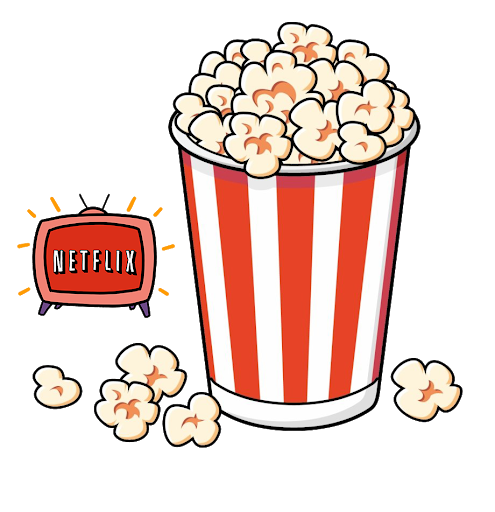

In [18]:
from IPython.display import Image
Image(filename='netflix.PNG')

In [19]:
 import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [20]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
# Therefore, it is clear that the dataset contains 12 columns for exploratory analysis.

netflix_overall.shape

(7787, 12)

In [22]:
netflix_overall.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [23]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']

In [24]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

## Analysis of Movies vs TV Shows.

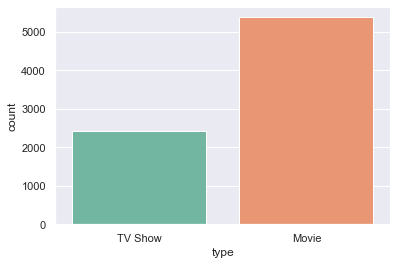

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

It is evident that there are more Movies on Netflix than TV shows.

### If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

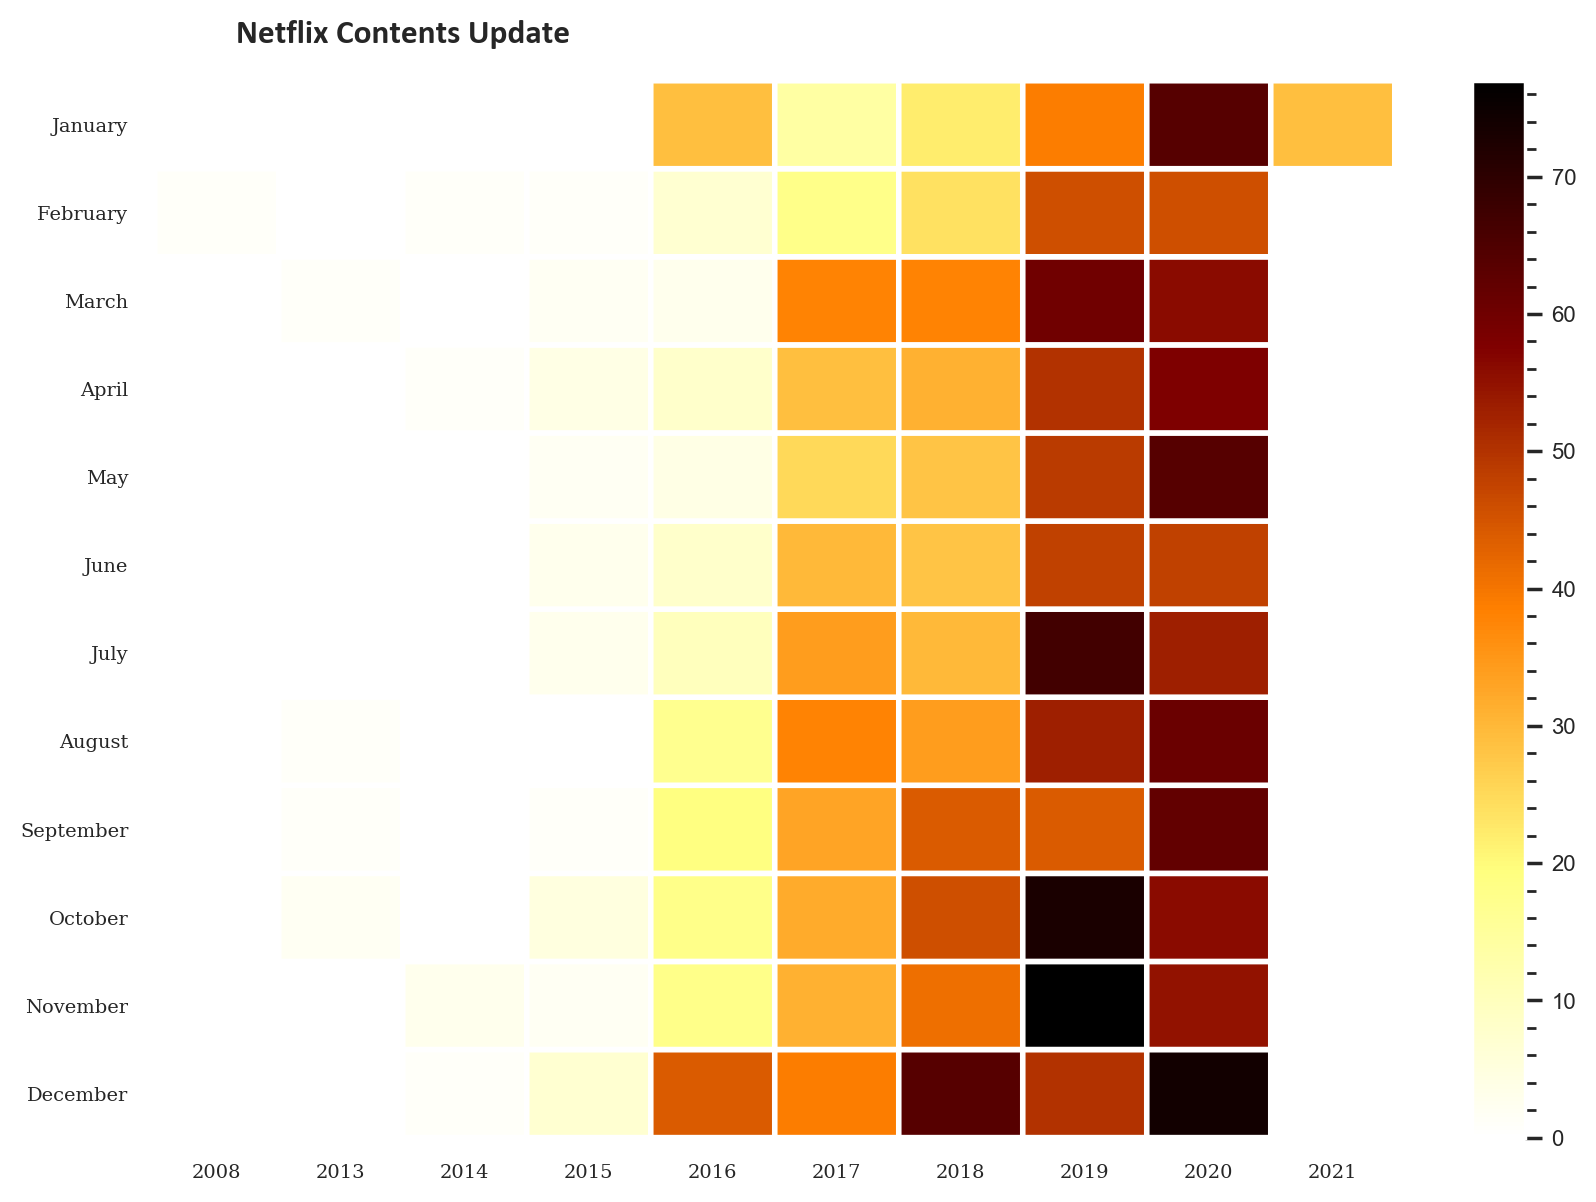

In [26]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the latest year 2020 is considered, February and June were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

# Movie ratings analysis

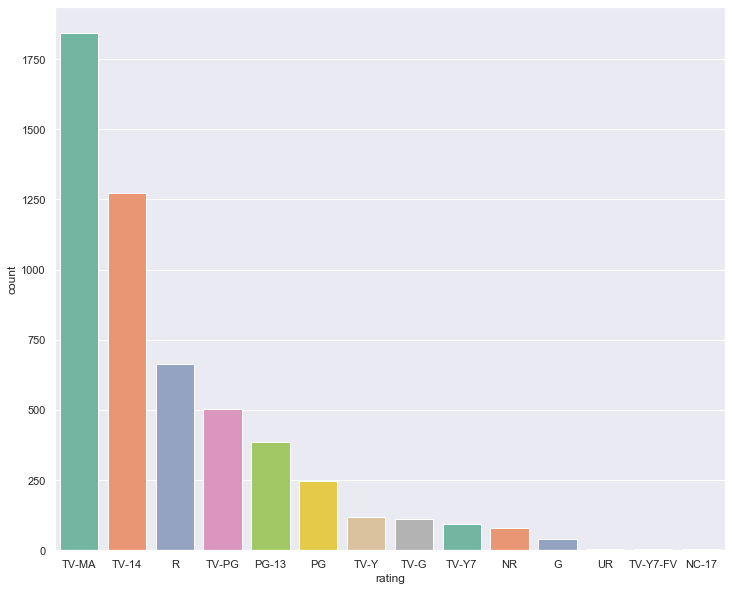

In [27]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

## Analysing IMDB ratings to get top rated movies on Netflix

In [28]:
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [29]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

Top rated 10 movies on Netflix are:

In [30]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

Countries with highest rated content.

In [31]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [32]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'South Korea','Indonesia','France','United Kingdom , United States','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

# Year wise analysis

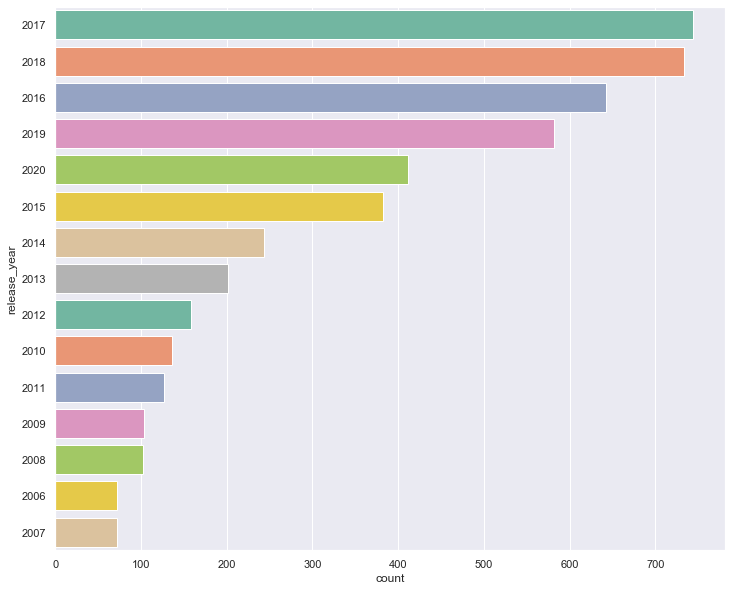

In [33]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

So, 2017 was the year when most of the movies were released.

In [34]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

## TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

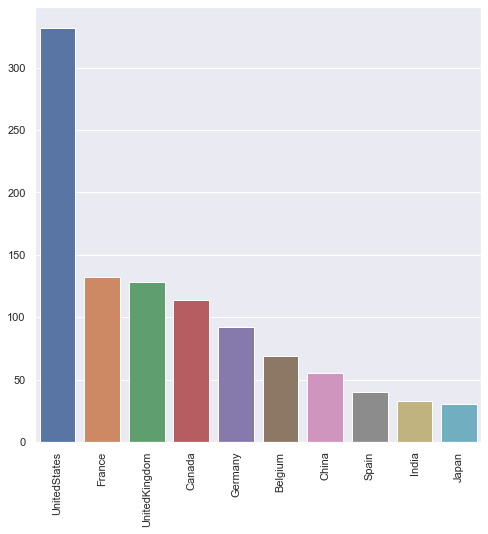

In [36]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

## Analysis of duration of movies

In [37]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

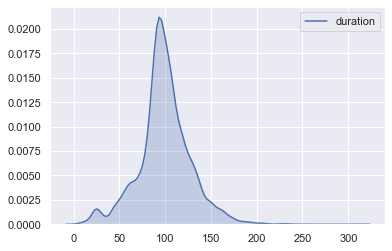

In [38]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. Can you?

In [39]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# WordCloud for Genres.

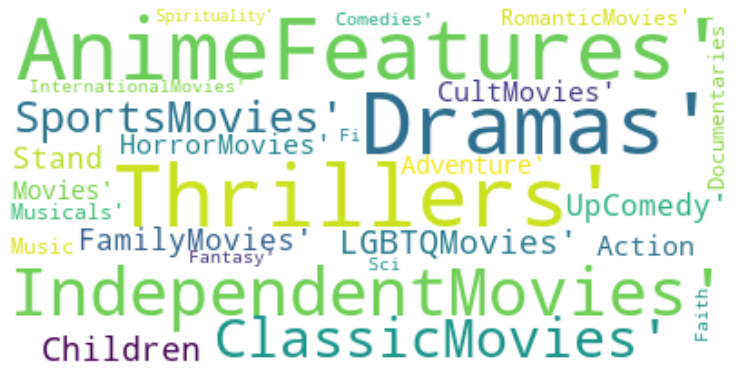

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Lollipop plot of Genres vs their count on Netflix

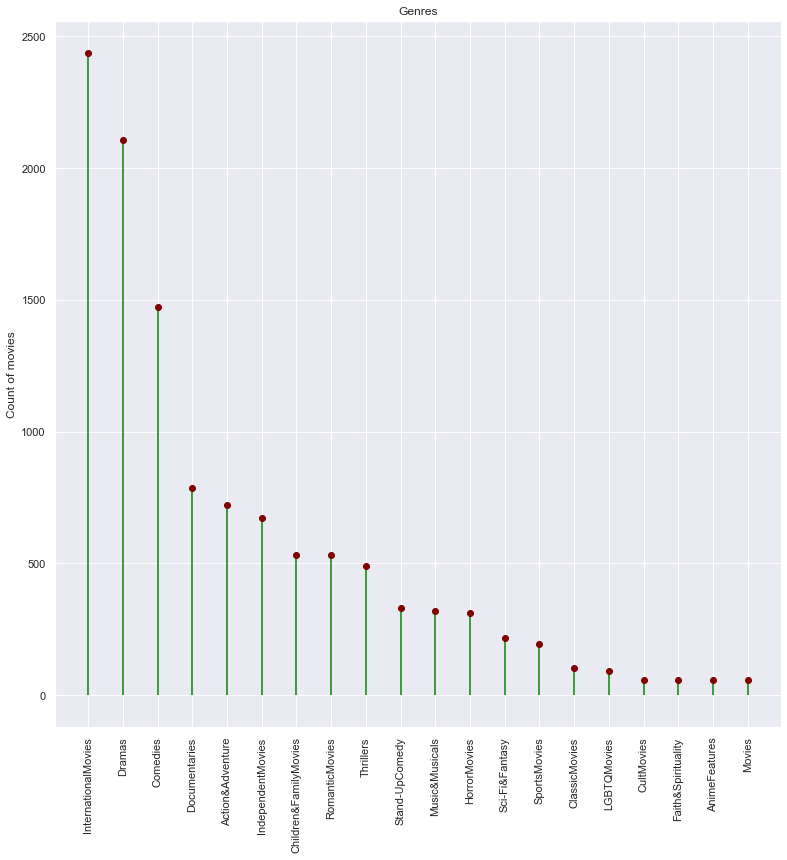

<Figure size 720x720 with 0 Axes>

In [41]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

## Analysis of TV SERIES on Netflix

In [42]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

## Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

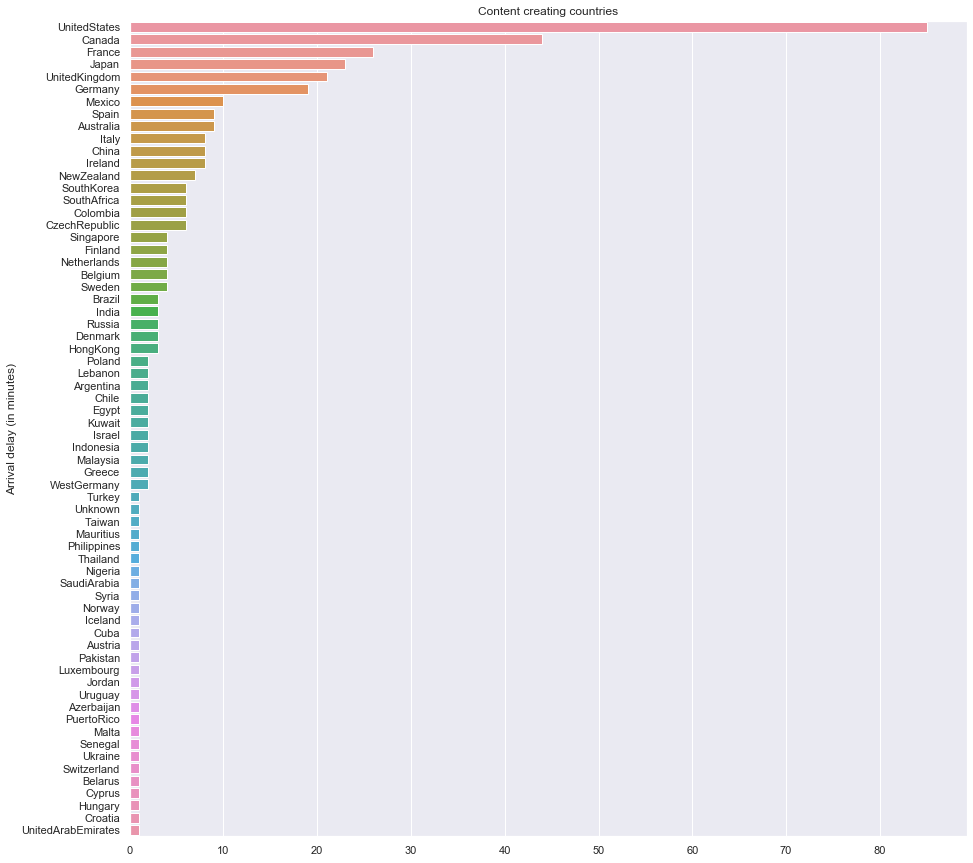

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Naturally, United States has the most content that is created on netflix in the tv series category.

In [45]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## TV shows with largest number of seasons

In [47]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

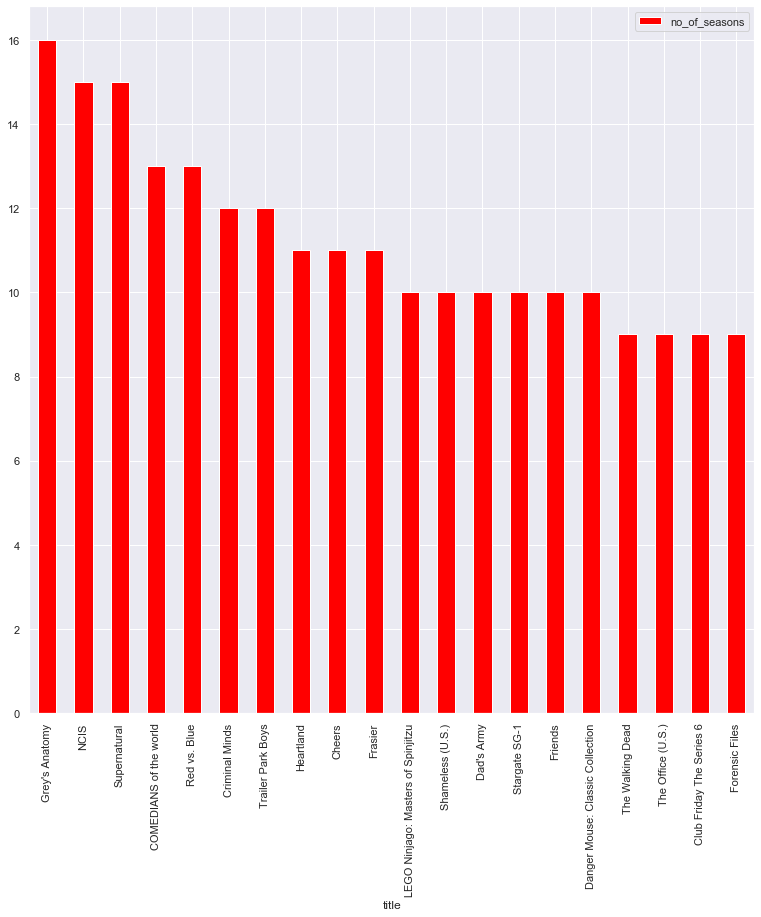

In [48]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

# Lowest number of seasons.

In [49]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

These are some binge-worthy shows that are short and have only one season.

In [50]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# Word Cloud for Genres

A word cloud is an image made of words that together resemble a cloudy shape.

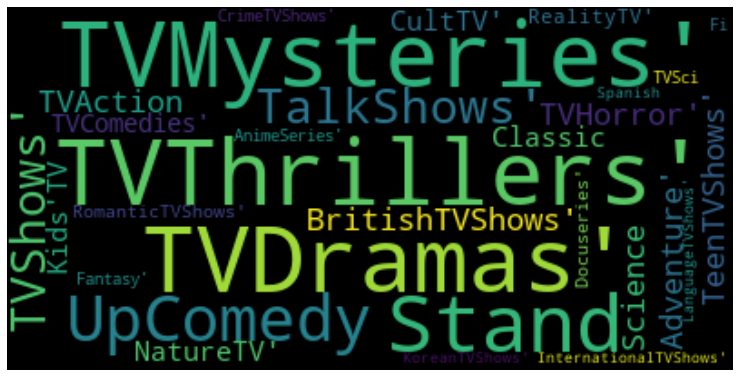

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
india_series_data=netflix_shows[netflix_shows['country']=='India']

In [53]:
oldest_india_series=india_series_data.sort_values(by='release_year')[0:20]

In [54]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_india_series['title'],oldest_india_series['release_year']],fill_color='pink'))
                     ])
fig.show()

Above table shows the oldest Indian tv shows on Netflix.

In [55]:
newest_india_series=india_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [56]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_india_series['title'],newest_india_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

The above are latest released Indian television shows!

# Content in Canada

In [57]:
netflix_fr=netflix_overall[netflix_overall['country']=='Canada']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

It is very interesting to note that the content in Canada have large variety. In my opinion, it shows how different directors are given a chance to showcase their talents. What do you think?

In [58]:
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

In [59]:
newest_fr_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
1192,s1193,TV Show,Can You Hear Me?,NaN,"Mélissa Bédard, Ève Landry, Florence Longpré",Canada,"November 2, 2020",2020,TV-MA,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",Three friends in a low-income neighborhood fin...
2745,s2746,TV Show,Hip-Hop Evolution,NaN,Shad Kabango,Canada,"January 17, 2020",2020,TV-MA,4 Seasons,"Docuseries, International TV Shows","Interviews with influential MCs, DJs and mogul..."
3395,s3396,TV Show,Kim's Convenience,NaN,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Si...",Canada,"April 1, 2020",2020,TV-MA,4 Seasons,TV Comedies,"While running a convenience store in Toronto, ..."
3591,s3592,TV Show,LEGO Ninjago,NaN,"Michael Adamthwaite, Paul Dobson, Kelly Metzge...",Canada,"November 1, 2020",2020,TV-Y7,2 Seasons,Kids' TV,While fighting foes across Ninjago City and be...
4076,s4077,Movie,Midnight at the Magnolia,Maxwell McGuire,"Natalie Hall, Evan Williams, Michael Gordon Sh...",Canada,"November 5, 2020",2020,TV-G,87 min,"Comedies, Romantic Movies",Longtime friends and local radio hosts Maggie ...
4346,s4347,TV Show,My Perfect Landing,NaN,"Morgan Wigle, Tom Hulshof, Helena Marie, Shawn...",Canada,"August 1, 2020",2020,TV-G,1 Season,Kids' TV,Everything changes for talented young gymnast ...
4590,s4591,TV Show,Oh Yuck,NaN,"Kayne Tremills, Nia Roam, David Collins, Shane...",Canada,"May 1, 2020",2020,TV-G,1 Season,"Kids' TV, TV Comedies","Using a concoction of cartoons, comedy and liv..."
5169,s5170,TV Show,Restaurants on the Edge,NaN,"Nick Liberato, Karin Bohn, Dennis Prescott",Canada,"May 8, 2020",2020,TV-14,2 Seasons,"International TV Shows, Reality TV",Three food and design experts travel the world...
5317,s5318,TV Show,Rust Valley Restorers,NaN,"Mike Hall, Michael Daingerfield",Canada,"August 21, 2020",2020,TV-14,3 Seasons,"International TV Shows, Reality TV","Old-school auto collector Mike Hall, his pal A..."


In [60]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

## Top Duration

In [61]:
topdirs=pd.value_counts(netflix_overall['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

It can be inferred that having one season is the most preferred duration.

## Recommendation System (Content Based)

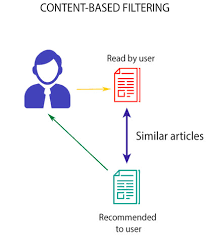

In [62]:
from IPython.display import Image
Image(filename='download.PNG')

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

There are about 17905 words described for the 7787 movies in this dataset.

In [65]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [66]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [67]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

This recommendation is just based on the Plot.

In [68]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [69]:
get_recommendations('Mortel')

4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

## Content based filtering on multiple metrics

Content based filtering on the following factors:

* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [70]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


Cleaning the data - making all the words lower case

In [71]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [72]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [73]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."


##### Creating a "soup" or a "bag of words" for all rows.

In [74]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [75]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [77]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [78]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [79]:
get_recommendations_new('PK', cosine_sim2)

100                            3 Idiots
6585       The Legend of Michael Mishra
552                   Anthony Kaun Hai?
2571                             Haapus
5377                              Sanju
5954                   Taare Zameen Par
1261                    Chal Dhar Pakad
1271                    Chance Pe Dance
1831                            Dostana
1988    EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [80]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

2419                                   Giri / Haji
6374                   The Frankenstein Chronicles
6693                         The Murder Detectives
3692                                        Loaded
3412                                 Kiss Me First
2616                                  Happy Valley
2381                                      Get Even
2846    How to Live Mortgage Free with Sarah Beeny
2886                                 I AM A KILLER
3013                      Inside the Criminal Mind
Name: title, dtype: object

In [81]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2168                                        Find Yourself
1590                                       Dancing Angels
4024                     Melodies of Life - Born This Way
3676                                        Little Things
1435    Club Friday To Be Continued - My Beautiful Tomboy
5219                                           Rishta.com
38                                    แผนร้ายนายเจ้าเล่ห์
294                                  Accidentally in Love
720                                     Bangkok Bachelors
1463                                      College Romance
Name: title, dtype: object

## How many Netflix Shows/ Movies are made from books as their storylines?

For a detailed book recommendation system with both content and collaborative filtering click : https://github.com/deepak7642/deepakkaura-Netflix-Recommendation-model-EDA-/blob/main/Netflix%20(Netflix%20Vs%20Books-Recommender%2C%20Analysis%2C%20EDA).ipynb

In [82]:
books=pd.read_csv('books.csv')
books['original_title']=books['original_title'].str.lower()
x=netflix_overall
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title', right_on='original_title', how="inner")

In [83]:
t.shape

(289, 35)

In [84]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [289,7787]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Hence, more accurate predictions are obtained.